In [25]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import tensorflow as tf
from tensorflow.keras.datasets import mnist

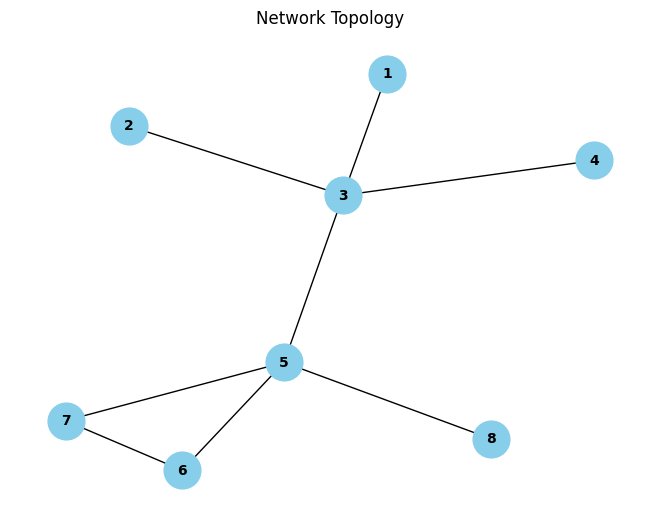

In [2]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Add edges
edges = [(1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7), (5, 8), (6, 7)]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Show the graph
plt.title("Network Topology")
plt.show()

In [3]:
# Calculate betweenness centrality
epsilon = 1e-4
betweenness_centrality = nx.betweenness_centrality(G)

# add an epsilon for each betweenness centrality in order to not have sampling probability = 0
for node in G.nodes():
    betweenness_centrality[node] += epsilon

# Print betweenness centrality for each node
print("Node\tBetweenness Centrality")
for node, centrality in betweenness_centrality.items():
    print(f"{node}\t{centrality:.4f}")

important_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0]
nds = []
centr = []
for n, c in betweenness_centrality.items():
    nds.append(n)
    centr.append(c)

Node	Betweenness Centrality
1	0.0001
2	0.0001
3	0.7144
4	0.0001
5	0.6668
6	0.0001
7	0.0001
8	0.0001


In [4]:
# Normalize betweenness centrality to get probabilities
total_centrality = sum(betweenness_centrality.values())
sampling_probabilities = {node: centrality / total_centrality for node, centrality in betweenness_centrality.items()}

# Print sampling probabilities of each node
for node, probability in sampling_probabilities.items():
    print(f"Node {node}: Sampling Probability = {probability}")

Node 1: Sampling Probability = 7.237186733202836e-05
Node 2: Sampling Probability = 7.237186733202836e-05
Node 3: Sampling Probability = 0.5170142813818202
Node 4: Sampling Probability = 7.237186733202836e-05
Node 5: Sampling Probability = 0.48255148741418763
Node 6: Sampling Probability = 7.237186733202836e-05
Node 7: Sampling Probability = 7.237186733202836e-05
Node 8: Sampling Probability = 7.237186733202836e-05


Auxiliary graph:

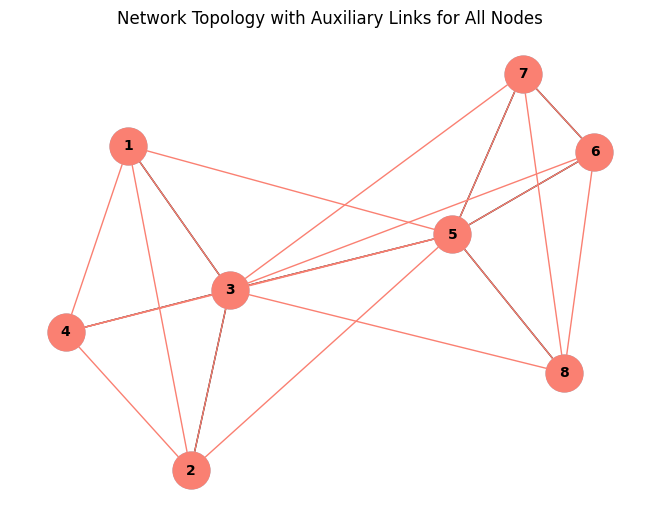

In [5]:
# Create a new graph for modification
H = nx.Graph(G)

# Iterate through each node
for node in G.nodes():
    # Find the neighbors of the current node
    neighbors_of_node = list(G.neighbors(node))
    # Find the common neighbors between the current node and its neighbors
    common_neighbors = set()
    for neighbor in neighbors_of_node:
        common_neighbors.update(set(G.neighbors(neighbor)))
    # Create a subgraph containing the current node, its neighbors, and the common neighbors
    subgraph_nodes = [node] + neighbors_of_node + list(common_neighbors)
    subgraph = G.subgraph(subgraph_nodes)
    # Add edges between the current node and its common neighbors
    for common_neighbor in common_neighbors:
        H.add_edge(node, common_neighbor)
        H.remove_edges_from([(node, node)])  # Fix: Remove self-loops

# Draw the original graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Draw the modified graph
nx.draw_networkx_nodes(H, pos, node_size=700, node_color="salmon")
nx.draw_networkx_edges(H, pos, edge_color="salmon")

# Show the graph
plt.title("Network Topology with Auxiliary Links for All Nodes")
plt.show()

Apply greedy coloring algorithm to find subsets:

Subset 0: [3]
Subset 1: [5]
Subset 2: [1, 6]
Subset 3: [2, 7]
Subset 4: [4, 8]


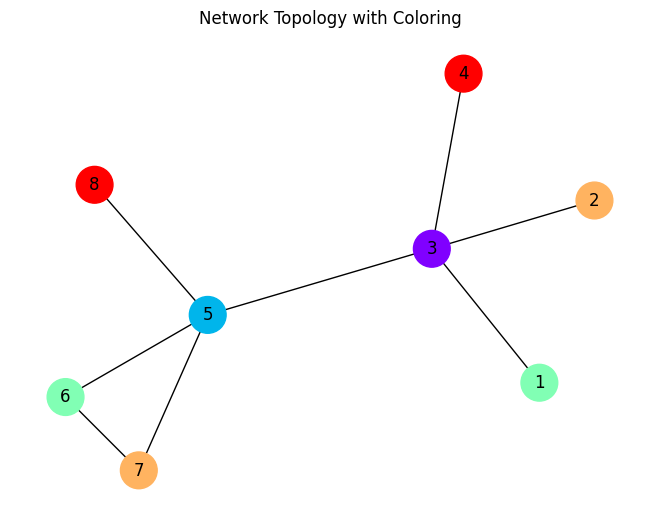

In [6]:
# Create a new graph for modification
H = nx.Graph(G)

# Iterate through each node
for node in G.nodes():
    # Find the neighbors of the current node
    neighbors_of_node = list(G.neighbors(node))
    # Find the common neighbors between the current node and its neighbors
    common_neighbors = set()
    for neighbor in neighbors_of_node:
        common_neighbors.update(set(G.neighbors(neighbor)))
    # Create a subgraph containing the current node, its neighbors, and the common neighbors
    subgraph_nodes = [node] + neighbors_of_node + list(common_neighbors)
    subgraph = G.subgraph(subgraph_nodes)
    # Add edges between the current node and its common neighbors
    for common_neighbor in common_neighbors:
        H.add_edge(node, common_neighbor)

# Apply greedy coloring algorithm
colors = nx.greedy_color(H)

# Assign colors to nodes
for node, color in colors.items():
    G.nodes[node]['color'] = color

# Determine collision-free subsets
collision_free_subsets = {color: [] for color in set(colors.values())}
for node, color in colors.items():
    collision_free_subsets[color].append(node)

subsets_list = []

# Print collision-free subsets
for color, nodes in collision_free_subsets.items():
    subsets_list.append(nodes)
    print(f"Subset {color}: {nodes}")

# Draw the graph with node colors
pos = nx.spring_layout(G)
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.rainbow)
plt.title("Network Topology with Coloring")
plt.show()

In [7]:
def set_betweenness_centrality(G, Vj):
    # Calculate set betweenness centrality
    epsilon = 1e-4
    betweenness_centrality = nx.betweenness_centrality(G)

    # add an epsilon for each betweenness centrality in order to not have sampling probability = 0
    for node in G.nodes():
        betweenness_centrality[node] += epsilon

    # Calculate the sum of betweenness centrality for nodes in Vj
    bs_j = np.sum(betweenness_centrality[i] for i in Vj if i in betweenness_centrality)
    return bs_j

In [8]:
total_set_centrality = 0
ps_k = [0] * len(subsets_list)  # Initialize the list with empty values
set_centrality = [0] * len(subsets_list)  # Initialize the list with empty values

for i in range(len(subsets_list)):
    print(f"Subset {i}: {subsets_list[i]}")
    set_centrality[i] = set_betweenness_centrality(G, subsets_list[i])
    total_set_centrality += set_centrality[i]
    print(f"Set betweenness Centrality: {set_centrality[i]}")

Subset 0: [3]
Set betweenness Centrality: 0.7143857142857142
Subset 1: [5]
Set betweenness Centrality: 0.6667666666666666
Subset 2: [1, 6]
Set betweenness Centrality: 0.0002
Subset 3: [2, 7]
Set betweenness Centrality: 0.0002
Subset 4: [4, 8]
Set betweenness Centrality: 0.0002


/var/folders/n7/cb4k4wkx09d8t78rgv7whj9m0000gn/T/ipykernel_2078/3812666293.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  bs_j = np.sum(betweenness_centrality[i] for i in Vj if i in betweenness_centrality)


In [9]:
for i in range(len(subsets_list)):
    ps_k[i] = set_centrality[i] / total_set_centrality # set sampling probability

The sum of scheduling probabilities over all subsets must equal the communication budget (B). 

In [10]:
B = sum(ps_k) # total sampling probability

In [21]:
def design_scheduling_probabilities(G, subsets, communication_budget, psk):
    """
    Design scheduling probabilities based on betweenness centrality.

    Parameters:
        G (nx.Graph): The graph.
        subsets (list of lists): List of subsets, where each subset is represented by a list of nodes.
        gamma (float): Constant parameter for scaling betweenness centrality.
        communication_budget (int): Average number of transmission slots per iteration.

    Returns:
        list: List of scheduling probabilities for each subset.
    """
    total_probability = sum(psk)
    gamma = total_probability / communication_budget
    scheduling_probabilities = [0] * len(subsets)
    for idx in range(len(subsets)):
        scheduling_probabilities[idx] = min(1, gamma * psk[idx])
    
    # Adjust probabilities to satisfy communication budget constraint
    # scheduling_probabilities = [prob * gamma for prob in scheduling_probabilities]

    return scheduling_probabilities

In [22]:
psj = design_scheduling_probabilities(G, subsets_list, B, ps_k)
print("Scheduling probabilities:", psj)
sum(psj)

Scheduling probabilities: [0.5170142813818202, 0.48255148741418763, 0.00014474373466405671, 0.00014474373466405671, 0.00014474373466405671]


1.0

training dataset was divided into 2N shards
(for a total of N users), and each user’s local dataset is given
by 2 randomly selected shards with no repetition. 

In [26]:
def create_shards(x, y, N):
    # Create an array of indices and shuffle it
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    # Split the indices into 2N shards
    shards = np.array_split(indices, N * 2)

    # Assign 2 shards to each user
    user_data = {}
    for i in range(N):
        user_data[i] = (x[np.concatenate(shards[i*2:i*2+2])], y[np.concatenate(shards[i*2:i*2+2])])

    return user_data

In [16]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Create shards and assign them to users
N = len(G.nodes())
user_data = create_shards(X_train, y_train, N)

# Now, user_data[i] contains the data for the i-th user

In [27]:
from net import MLP
mlp = MLP(input_shape=(28, 28), num_classes=10)

mlp.compile()
mlp.fit(X_train, y_train, epochs=20, batch_size=128)

loss, accuracy = mlp.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:32: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.8800 - loss: 0.3810 - learning_rate: 0.0100
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.9631 - loss: 0.1218 - learning_rate: 0.0100
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.9705 - loss: 0.0942 - learning_rate: 0.0100
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.9769 - loss: 0.0742 - learning_rate: 0.0100
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.9792 - loss: 0.0708 - learning_rate: 0.0100
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9792 - loss: 0.0709 - learning_rate: 0.0100
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.9835 - loss: 0.0591 - learning_rate: 0.0100
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.9800 - loss: 0.0672 - learning_rate: 0.0100
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9842 - loss: 0.0544 - learning_rate: 0.0100
Epo